# A generic ML analysis in Python

## Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Simulate a dataset

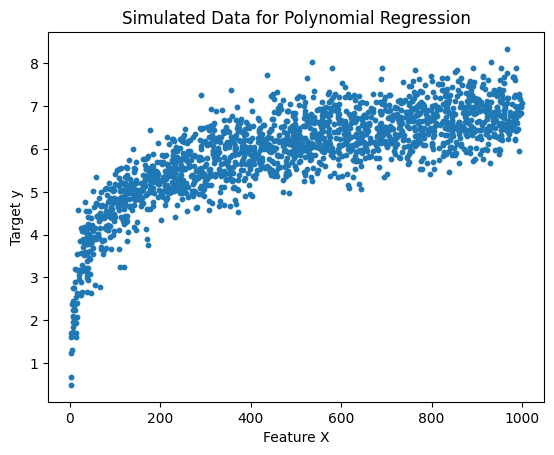

In [7]:
# Set a seed for reproducibility

np.random.seed(12345)

# Generate data
X = np.random.randint(1, 1000, size=1789)  # Number of employees
errors = np.random.normal(0, 0.5, size=1789)  # Random errors
Y = np.log(X) + errors  # Gross earnings with a logarithmic relationship plus some error

# Create a DataFrame
df = pd.DataFrame({'Number of Employees': X, 'Gross Earnings': Y})


# Visualize the data
plt.scatter(X, Y, s=10)
plt.title("Simulated Data for Polynomial Regression")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.show()

## 0. Understand the business

In the context of a Public Policies center, understanding the business interests is vital for aligning machine learning solutions with policy objectives and societal needs. It involves recognizing the center's goals, such as improving public welfare, enhancing service delivery, or informing policy decisions, and tailoring ML projects to support these aims effectively. This deep understanding ensures that ML initiatives are not only technically sound but also relevant and impactful in addressing the unique challenges and opportunities within the public policy domain.

## 1. Define the problem


Purpose: Understanding the problem we're trying to solve is crucial before diving into the data. This includes defining whether it's a classification, regression, clustering problem, etc. For our simulated case, we'll assume we're facing a regression problem aiming to predict the 'Target' based on 'Feature1' and 'Feature2'.

Code: This step is more conceptual and doesn't require code, but it's essential to guide future decisions.

## 2. Prepare the Data

Data preparation involves cleaning the data (data wrangling), splitting it into training and testing sets, and performing any necessary preprocessing.

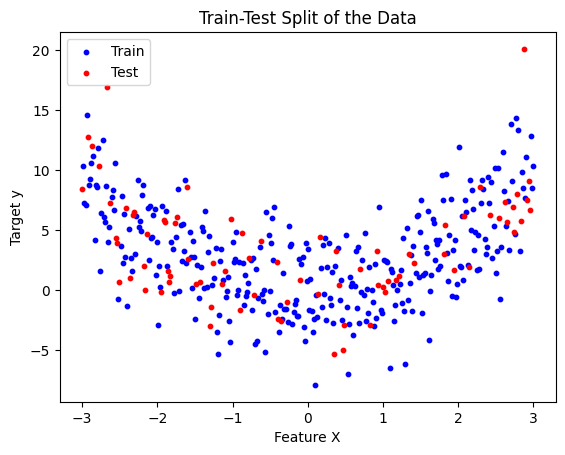

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the split
plt.scatter(X_train, y_train, color='blue', label='Train', s=10)
plt.scatter(X_test, y_test, color='red', label='Test', s=10)
plt.legend()
plt.title("Train-Test Split of the Data")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.show()


## 3. Choose a Model and train

Based on the problem type and data characteristics, we select a ML model. For our regression problem, we'll start with a simple Linear Regression.

With the chosen model, we proceed to train it using the training dataset. This involves fitting the model's parameters to our data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear Regression
linear_model = LinearRegression().fit(X_train, y_train)

# Polynomial Regression - Degree 2
poly2_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly2_model.fit(X_train, y_train)

# Polynomial Regression - Degree 3
poly3_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly3_model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

## 4. Train the Model

## 5. Evaluate the Models

We assess the models' performance using Mean Squared Error (MSE) and visualize their fit.

Linear Model MSE: 20.07374544221224
Polynomial Degree 2 Model MSE: 9.386146789227174
Polynomial Degree 3 Model MSE: 9.466846798145067


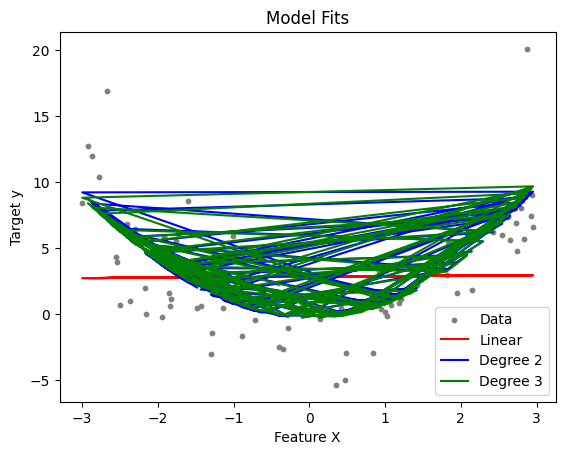

In [ ]:
from sklearn.metrics import mean_squared_error

# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_poly2 = poly2_model.predict(X_test)
y_pred_poly3 = poly3_model.predict(X_test)

# Evaluate and print MSE
print("Linear Model MSE:", mean_squared_error(y_test, y_pred_linear))
print("Polynomial Degree 2 Model MSE:", mean_squared_error(y_test, y_pred_poly2))
print("Polynomial Degree 3 Model MSE:", mean_squared_error(y_test, y_pred_poly3))

# Plot the models
plt.scatter(X_test, y_test, color='gray', label='Data', s=10)
plt.plot(X_test, y_pred_linear, label='Linear', color='red')
plt.plot(X_test, np.sort(y_pred_poly2), label='Degree 2', color='blue')
plt.plot(X_test, np.sort(y_pred_poly3), label='Degree 3', color='green')
plt.legend()
plt.title("Model Fits")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.show()


### Learning curves

Learning curves can help diagnose model performance issues, such as underfitting or overfitting.

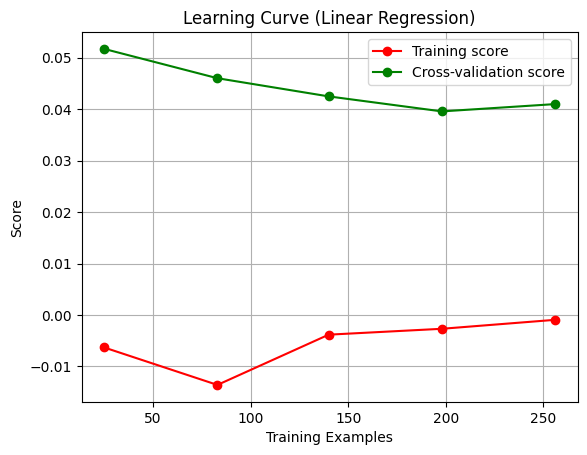

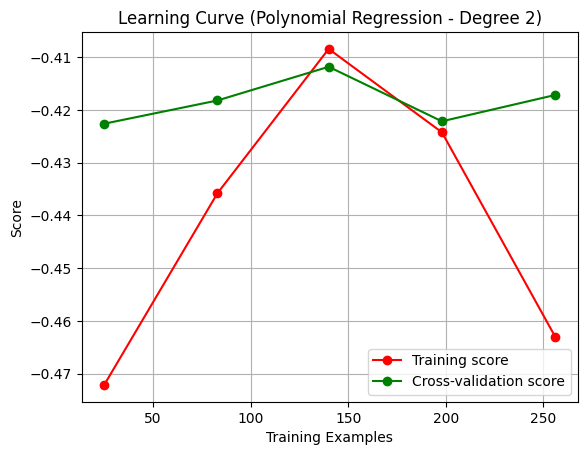

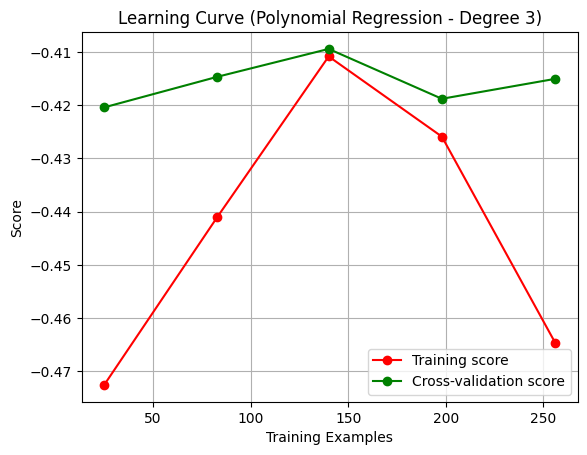

In [ ]:
# Learning curves

from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves for each model
plot_learning_curve(linear_model, X_train, y_train, "Learning Curve (Linear Regression)")
plot_learning_curve(poly2_model, X_train, y_train, "Learning Curve (Polynomial Regression - Degree 2)")
plot_learning_curve(poly3_model, X_train, y_train, "Learning Curve (Polynomial Regression - Degree 3)")

## 5. Parameter Tuning

Exploring different polynomial degrees to find the optimal model complexity.

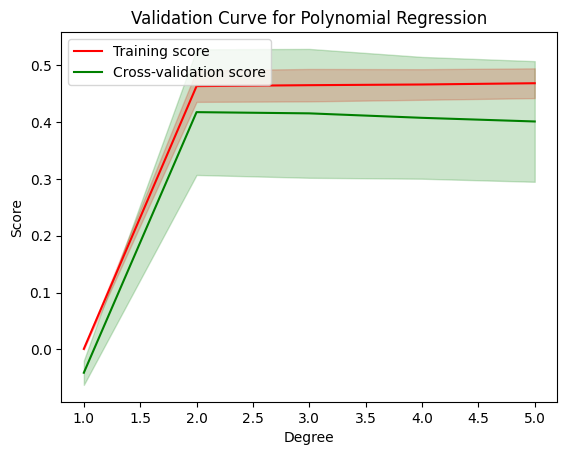

In [ ]:
from sklearn.model_selection import validation_curve

# Define a range of degrees to test
degrees = np.arange(1, 6)

# Use validation_curve to evaluate model performance
train_scores, test_scores = validation_curve(poly2_model, X_train, y_train, param_name='polynomialfeatures__degree', param_range=degrees, cv=5)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.plot(degrees, train_mean, label="Training score", color="r")
plt.plot(degrees, test_mean, label="Cross-validation score", color="g")

plt.fill_between(degrees, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(degrees, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Validation Curve for Polynomial Regression")
plt.xlabel("Degree")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


## 6. Make Prediction

In [ ]:
# New data point
X_new = np.array([[0.5]])

# Predict with the degree 2 polynomial model
y_new_pred = poly2_model.predict(X_new)
print(f"Prediction for {X_new[0]}: {y_new_pred[0]}")

Prediction for [0.5]: [0.03663476]


## 7. ML Ops

This step involves deploying the model, monitoring its performance in a production environment, and regularly updating it with new data. It's more about processes and infrastructure than specific code snippets and usually involves collaboration with data engineers and DevOps teams.

This structured approach covers each stage of the ML cycle for a polynomial regression case, providing a clear understanding of the purpose and implementation at each step.